🚀 เริ่มระบบวิเคราะห์หุ้น: CPN
✅ ดึงข้อมูลได้ 729 แถว



/Users/hilmanyusoh/Desktop/stock_pattern/venv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


🧠 กำลังเทรน LSTM (Features: High, Low, Close)...
📈 LSTM Performance:   MAE: 1.12 บาท   RMSE: 1.36 บาท   R²: 0.7786
🔮 ราคาพยากรณ์ 5 วันข้างหน้า:
   วันที่ 1: 55.50 บาท
   วันที่ 2: 55.60 บาท
   วันที่ 3: 55.68 บาท
   วันที่ 4: 55.74 บาท
   วันที่ 5: 55.80 บาท

📊 CNN Dataset - Pattern Labels: 12.0/699 samples
🔍 กำลังเทรน CNN Model...


/Users/hilmanyusoh/Desktop/stock_pattern/venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Positive prob: [0.15832128 0.11140066 0.10790598]
Negative prob mean: 0.12198642
🎯 CNN Performance:
   Accuracy:  0.7929   Precision: 0.0357   Recall: 0.3333
   F1 Score:  0.0645   ROC AUC: 0.6058
Train labels: [550   9]
Test labels : [137   3]
📰 กำลังวิเคราะห์ Sentiment สำหรับ CPN...


Device set to use mps:0



📊 กำลังสร้างกราฟวิเคราะห์...


/Users/hilmanyusoh/Desktop/stock_pattern/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hilmanyusoh/Desktop/stock_pattern/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hilmanyusoh/Desktop/stock_pattern/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3588 (\N{THAI CHARACTER KHO KHWAI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hilmanyusoh/Desktop/stock_pattern/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hilmanyusoh/Desktop/stock_pattern/venv/lib/pyth

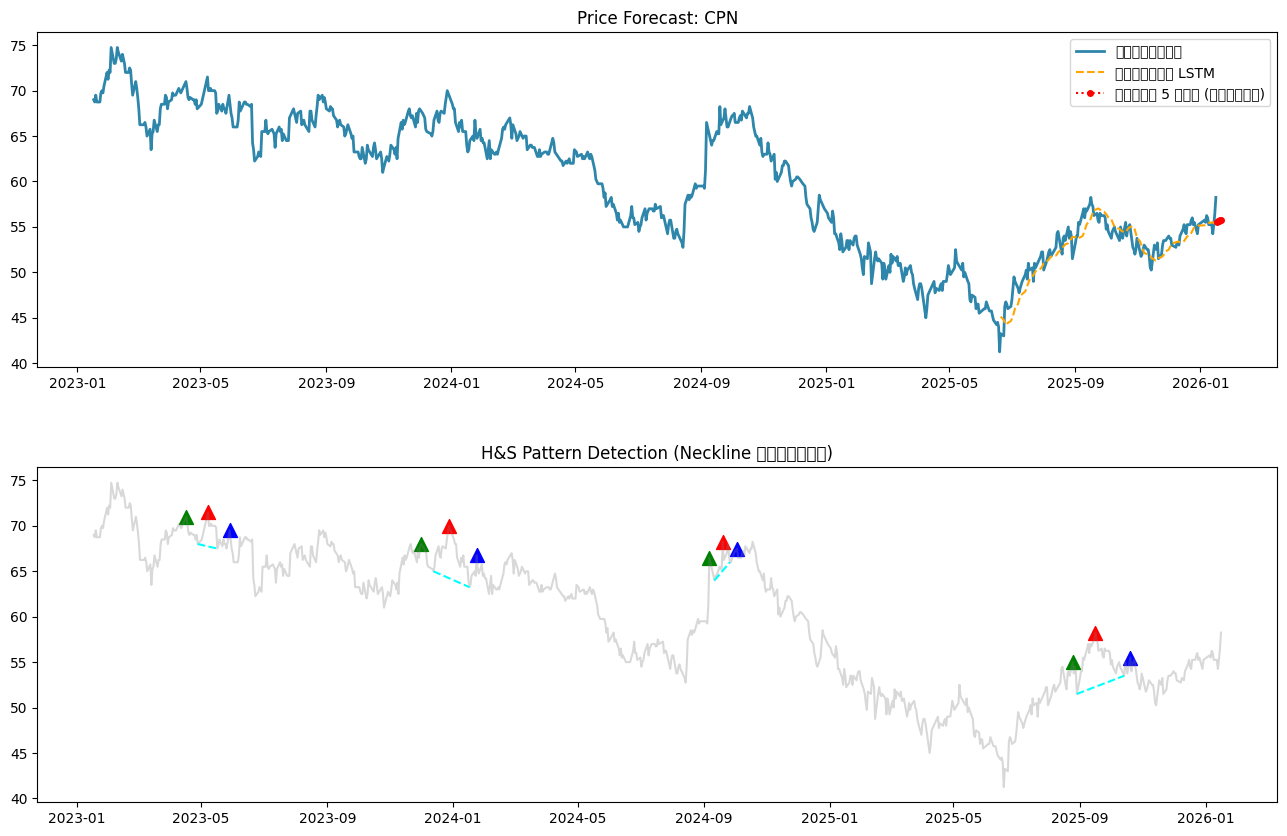


📊 รายงานสรุปและกลยุทธ์การลงทุนหุ้น CPN
📈 [LSTM] แนวโน้มราคา: 55.50 บาท (-4.72%)
🔍 [CNN]  สัญญาณเทคนิค: ⚠️ ตรวจพบรูปแบบ H&S (เสี่ยงขาลง)
📰 [NLP]  อารมณ์ข่าวสาร: NEGATIVE 🔴 (Score: -0.9954)
-----------------------------------------------------------------
💡 วิเคราะห์สถานการณ์และความเห็น AI:
🔴 สภาวะ [Bearish Alignment]: ข่าวร้ายสมทบกับกราฟขาลง
   - ความเห็น: สัญญาณลบยืนยันกันทั้งสองมิติ มีโอกาสปรับตัวลงแรง
   - กลยุทธ์: 'ขาย/หลีกเลี่ยง' จนกว่าจะสร้างฐานใหม่

🎯 คำแนะนำสุดท้าย: REDUCE/WATCH


In [6]:
from cassandra.cluster import Cluster
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

# Scikit-learn
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import class_weight
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, roc_curve, auc
)

# TensorFlow / Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# NLP / Sentiment
from transformers import pipeline
import os

# ตั้งค่าสิ่งแวดล้อม
os.environ["TF_USE_LEGACY_KERAS"] = "1"

# ========================================
# 1. ตั้งค่าพารามิเตอร์เบื้องต้น
# ========================================
CASSANDRA_HOST = '127.0.0.1'
CASSANDRA_PORT = 9042
SYMBOL = 'CPN' 

print(f"🚀 เริ่มระบบวิเคราะห์หุ้น: {SYMBOL}")

# ========================================
# 2. ฟังก์ชันดึงข้อมูลจาก Cassandra
# ========================================
def get_candlestick_data(symbol, cassandra_host, cassandra_port, limit=1000):
    cluster = Cluster([cassandra_host], port=cassandra_port)
    session = cluster.connect('data_stock')
    
    query = """
        SELECT symbol, time, open, high, low, close, volume, value 
        FROM candlestick_data 
        WHERE symbol = %s 
        LIMIT %s 
        ALLOW FILTERING
    """
    
    rows = session.execute(query, (symbol, limit))
    df = pd.DataFrame(list(rows))
    
    df['time'] = pd.to_datetime(df['time'])
    df.sort_values('time', inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    cluster.shutdown()
    return df

df = get_candlestick_data(SYMBOL, CASSANDRA_HOST, CASSANDRA_PORT)
print(f"✅ ดึงข้อมูลได้ {len(df)} แถว\n")

# ========================================
# 3. ฟังก์ชันหา Head & Shoulders Pattern
# ========================================
def generate_hs_labels(df, window=5):
    close_prices = df['close'].values
    labels = np.zeros(len(close_prices))
    local_max_idx = []
    
    for i in range(window, len(close_prices) - window):
        is_peak = True
        for j in range(1, window + 1):
            if close_prices[i] <= close_prices[i-j] or close_prices[i] <= close_prices[i+j]:
                is_peak = False
                break
        if is_peak:
            local_max_idx.append(i)
    
    hs_patterns = []
    for i in range(len(local_max_idx) - 2):
        ls_idx, head_idx, rs_idx = local_max_idx[i], local_max_idx[i + 1], local_max_idx[i + 2]
        ls_price, head_price, rs_price = close_prices[ls_idx], close_prices[head_idx], close_prices[rs_idx]
        
        # === Trend filter ===
        lookback = 20
        if ls_idx < lookback:
            continue

        past_return = (
            close_prices[ls_idx] - close_prices[ls_idx - lookback]
        ) / close_prices[ls_idx - lookback]

        # ต้องเป็น uptrend อย่างน้อย +5%
        if past_return < 0.05:
            continue

        if (head_price > ls_price and head_price > rs_price and 
            ls_price > 0 and abs(ls_price - rs_price) / ls_price < 0.08):

            left_valley_idx = ls_idx + np.argmin(close_prices[ls_idx:head_idx+1])
            right_valley_idx = head_idx + np.argmin(close_prices[head_idx:rs_idx+1])

            # ✅ LABEL เมื่อ Right Shoulder เสร็จ
            labels[rs_idx:rs_idx+3] = 1

            hs_patterns.append({
                'left_shoulder': {'idx': ls_idx, 'price': ls_price},
                'head': {'idx': head_idx, 'price': head_price},
                'right_shoulder': {'idx': rs_idx, 'price': rs_price},
                'left_valley': {'idx': left_valley_idx, 'price': close_prices[left_valley_idx]},
                'right_valley': {'idx': right_valley_idx, 'price': close_prices[right_valley_idx]}
            })

    
    return labels, hs_patterns

labels, patterns_found = generate_hs_labels(df)
df['hs_label'] = labels

# ========================================
# 4. เตรียมข้อมูลสำหรับ LSTM (High, Low, Close)
# ========================================
lstm_features = df[['high', 'low', 'close', 'hs_label']].values
scaler_lstm = MinMaxScaler()
scaled_data = scaler_lstm.fit_transform(lstm_features)

seq_length = 30
forecast_days = 5

X_lstm, y_lstm = [], []
for i in range(len(scaled_data) - seq_length):
    X_lstm.append(scaled_data[i:i+seq_length])
    y_lstm.append(scaled_data[i+seq_length, 2]) # Close index

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm).reshape(-1, 1)

split = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]

# ========================================
# 5. สร้างและเทรน LSTM Model
# ========================================
model_lstm = Sequential([
    LSTM(64, return_sequences=True, input_shape=(seq_length, 4)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

model_lstm.compile(loss='mse', optimizer='adam')
print("🧠 กำลังเทรน LSTM (Features: High, Low, Close)...")
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, validation_split=0.1, verbose=0)

# ฟังก์ชันแปลงกลับเฉพาะค่า Close
def inverse_close(scaler, scaled_val, close_index=2):
    scaled_val = np.array(scaled_val).reshape(-1, 1)
    
    n_features = scaler.min_.shape[0]   # จะได้ 4 อัตโนมัติ
    dummy = np.zeros((len(scaled_val), n_features))
    
    dummy[:, close_index] = scaled_val.flatten()
    return scaler.inverse_transform(dummy)[:, close_index]

y_pred_lstm = model_lstm.predict(X_test_lstm, verbose=0)
y_pred_rescaled = inverse_close(scaler_lstm, y_pred_lstm)
y_test_rescaled = inverse_close(scaler_lstm, y_test_lstm)

# --- [OUTPUT: LSTM Performance] ---
mae_val = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse_val = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
r2_val = r2_score(y_test_rescaled, y_pred_rescaled)
print(f"📈 LSTM Performance:   MAE: {mae_val:.2f} บาท   RMSE: {rmse_val:.2f} บาท   R²: {r2_val:.4f}")

# พยากรณ์อนาคต
future_predictions = []

n_features = scaled_data.shape[1]
current_batch = scaled_data[-seq_length:].reshape(1, seq_length, n_features)

for _ in range(forecast_days):
    next_pred = model_lstm.predict(current_batch, verbose=0)
    future_predictions.append(next_pred[0, 0])

    next_row = np.array([[next_pred[0,0], next_pred[0,0], next_pred[0,0], 0]])
    current_batch = np.append(
        current_batch[:, 1:, :],
        next_row.reshape(1, 1, n_features),
        axis=1
    )

future_prices = inverse_close(scaler_lstm, future_predictions)

# --- [OUTPUT: Future Forecast] ---
print(f"🔮 ราคาพยากรณ์ {forecast_days} วันข้างหน้า:")
for i, price in enumerate(future_prices, 1):
    print(f"   วันที่ {i}: {price:.2f} บาท")

# ========================================
# 6. เตรียมข้อมูลสำหรับ CNN (ตรวจจับ Pattern)
# ========================================
features_cnn = df[['close', 'volume']].values
scaler_cnn = MinMaxScaler()
cnn_scaled = scaler_cnn.fit_transform(features_cnn)

X_cnn, y_cnn = [], []
for i in range(len(cnn_scaled) - seq_length):
    X_cnn.append(cnn_scaled[i:i+seq_length])
    y_cnn.append(labels[i+seq_length])

X_cnn, y_cnn = np.array(X_cnn), np.array(y_cnn)
X_train_cnn, X_test_cnn = X_cnn[:split], X_cnn[split:]
y_train_cnn, y_test_cnn = y_cnn[:split], y_cnn[split:]

print(f"\n📊 CNN Dataset - Pattern Labels: {sum(y_cnn)}/{len(y_cnn)} samples")

# ========================================
# 7. สร้างและเทรน CNN Model
# ========================================
model_cnn = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(seq_length, 2)),
    MaxPooling1D(pool_size=2),
    Conv1D(32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("🔍 กำลังเทรน CNN Model...")
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_cnn), y=y_train_cnn)
model_cnn.fit(X_train_cnn, y_train_cnn, epochs=30, batch_size=32, validation_split=0.1, 
              class_weight=dict(enumerate(weights)), verbose=0)

y_pred_prob = model_cnn.predict(X_test_cnn, verbose=0).flatten()
y_pred_cnn = (y_pred_prob > 0.15).astype(int)

# --- [DEBUG: Probability Distribution] ---
pos_probs = y_pred_prob[y_test_cnn == 1]
neg_probs = y_pred_prob[y_test_cnn == 0]

print("Positive prob:", pos_probs)
print("Negative prob mean:", neg_probs.mean())


# --- [OUTPUT: CNN Performance] ---
accuracy_val = accuracy_score(y_test_cnn, y_pred_cnn)
precision_val = precision_score(y_test_cnn, y_pred_cnn, zero_division=0)
recall_val = recall_score(y_test_cnn, y_pred_cnn, zero_division=0)
f1_val = f1_score(y_test_cnn, y_pred_cnn, zero_division=0)
fpr, tpr, _ = roc_curve(y_test_cnn, y_pred_prob)
roc_auc_val = auc(fpr, tpr)

print(f"🎯 CNN Performance:")
print(f"   Accuracy:  {accuracy_val:.4f}   Precision: {precision_val:.4f}   Recall: {recall_val:.4f}")
print(f"   F1 Score:  {f1_val:.4f}   ROC AUC: {roc_auc_val:.4f}")
print("Train labels:", np.bincount(y_train_cnn.astype(int)))
print("Test labels :", np.bincount(y_test_cnn.astype(int)))

# ========================================
# 7.5 Sentiment Analysis
# ========================================
def analyze_market_sentiment(symbol):
    print(f"📰 กำลังวิเคราะห์ Sentiment สำหรับ {symbol}...")
    news_samples = {
        'ADVANC': [
            "ADVANC reports strong Q3 earnings, beating analyst expectations.",
            "AIS 5G subscriber base grows by 20% this quarter.",
            "Potential dividend payout increase sparks investor interest."
        ]
    }
    texts = news_samples.get(symbol, ["Market sentiment is neutral today."])
    try:
        sentiment_task = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
        results = sentiment_task(texts)
        avg_score = np.mean([r['score'] if r['label'] == 'POSITIVE' else -r['score'] for r in results])
        signal = "POSITIVE 🟢" if avg_score > 0.15 else "NEGATIVE 🔴" if avg_score < -0.15 else "NEUTRAL 🟡"
        return avg_score, signal
    except Exception as e:
        return 0.0, "NEUTRAL 🟡"

avg_sentiment_score, sentiment_signal = analyze_market_sentiment(SYMBOL)

# ========================================
# 8. กราฟวิเคราะห์ (เส้นประ Neckline และ Marker เล็ก)
# ========================================
def plot_complete_analysis(df, lstm_pred, future_pred, patterns):
    fig = plt.figure(figsize=(16, 10))
    gs = fig.add_gridspec(2, 1, height_ratios=[1, 1], hspace=0.3)
    
    # Plot 1: Price + LSTM
    ax1 = fig.add_subplot(gs[0])
    ax1.plot(df['time'], df['close'], label='ราคาจริง', color='#2E86AB', linewidth=2)
    test_times = df['time'].iloc[split+seq_length : split+seq_length+len(lstm_pred)]
    ax1.plot(test_times, lstm_pred, label='พยากรณ์ LSTM', linestyle='--', color='orange')
    
    last_date = df['time'].iloc[-1]
    future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=len(future_pred))
    ax1.plot(future_dates, future_pred, label='อนาคต 5 วัน (จุดแดง)', linestyle=':', color='red', marker='o', markersize=4)
    ax1.legend()
    ax1.set_title(f"Price Forecast: {SYMBOL}")

    # Plot 2: H&S Detection
    ax2 = fig.add_subplot(gs[1])
    ax2.plot(df['time'], df['close'], color='gray', alpha=0.3)
    
    if patterns:
        for i, p in enumerate(patterns):
            ax2.scatter(df['time'].iloc[p['left_shoulder']['idx']], p['left_shoulder']['price'], color='green', marker='^', s=100)
            ax2.scatter(df['time'].iloc[p['head']['idx']], p['head']['price'], color='red', marker='^', s=100)
            ax2.scatter(df['time'].iloc[p['right_shoulder']['idx']], p['right_shoulder']['price'], color='blue', marker='^', s=100)
            ax2.plot([df['time'].iloc[p['left_valley']['idx']], df['time'].iloc[p['right_valley']['idx']]], 
                     [p['left_valley']['price'], p['right_valley']['price']], 
                     color='cyan', linewidth=1.5, linestyle='--')
    
    ax2.set_title("H&S Pattern Detection (Neckline เส้นประ)")
    plt.show()

print("\n📊 กำลังสร้างกราฟวิเคราะห์...")
plot_complete_analysis(df, y_pred_rescaled, future_prices, patterns_found)

# ========================================
# 9. รายงานสรุปและการตัดสินใจ (Conflict Resolution)
# ========================================
print("\n" + "="*65)
print(f"📊 รายงานสรุปและกลยุทธ์การลงทุนหุ้น {SYMBOL}")
print("="*65)

# ข้อมูลดิบ
next_day_price = future_prices[0]
current_price = df['close'].iloc[-1]
price_diff_pct = ((next_day_price - current_price) / current_price) * 100
has_pattern = len(patterns_found) > 0

# 1. แสดงผลรายด้าน
print(f"📈 [LSTM] แนวโน้มราคา: {next_day_price:.2f} บาท ({price_diff_pct:+.2f}%)")
print(f"🔍 [CNN]  สัญญาณเทคนิค: {'⚠️ ตรวจพบรูปแบบ H&S (เสี่ยงขาลง)' if has_pattern else '✅ ไม่พบรูปแบบกลับตัว'}")
print(f"📰 [NLP]  อารมณ์ข่าวสาร: {sentiment_signal} (Score: {avg_sentiment_score:.4f})")
print("-" * 65)  

# 2. Logic การตัดสินใจเมื่อข้อมูลขัดแย้ง (Conflict Resolution)
print("💡 วิเคราะห์สถานการณ์และความเห็น AI:")

if has_pattern and avg_sentiment_score > 0.15:
    print("⚠️ สภาวะ [Divergence]: ตลาดมีข่าวบวก แต่โครงสร้างราคาเริ่มเสียทรง")
    print("   - ความเห็น: ข่าวดี (NLP) อาจเป็นเพียงแรงพยุงระยะสั้นเพื่อการระบายของ (Sell on Fact)")
    print("   - กลยุทธ์: 'ระวัง' หากราคาหลุดเส้นประสีฟ้า (Neckline) ให้ลดพอร์ตทันทีแม้ข่าวจะดี")

elif not has_pattern and avg_sentiment_score < -0.15:
    print("⚖️ สภาวะ [Fear Overreaction]: ข่าวเป็นลบ แต่กราฟยังไม่มีสัญญาณจบรอบ")
    print("   - ความเห็น: อาจเป็นการตกใจข่าวในระยะสั้น (Noise) แต่ทิศทางหลักยังไม่เปลี่ยน")
    print("   - กลยุทธ์: 'ถือต่อ' และใช้แนวรับล่าสุดเป็นจุดตัดสินใจ")

elif has_pattern and avg_sentiment_score < -0.15:
    print("🔴 สภาวะ [Bearish Alignment]: ข่าวร้ายสมทบกับกราฟขาลง")
    print("   - ความเห็น: สัญญาณลบยืนยันกันทั้งสองมิติ มีโอกาสปรับตัวลงแรง")
    print("   - กลยุทธ์: 'ขาย/หลีกเลี่ยง' จนกว่าจะสร้างฐานใหม่")

else:
    print("🚀 สภาวะ [Bullish Alignment]: ข่าวดีและกราฟยังรักษาทรงขาขึ้น")
    print("   - ความเห็น: ทิศทางสดใส มีโอกาสไปต่อตามพยากรณ์ LSTM")
    print("   - กลยุทธ์: 'ซื้อ/ถือต่อ' ตามวินัย")

# 3. สรุปคำแนะนำสุดท้าย
final_call = "REDUCE/WATCH" if has_pattern else "BUY/HOLD" if avg_sentiment_score > 0 else "SIDEWAY"
print(f"\n🎯 คำแนะนำสุดท้าย: {final_call}")
print("="*65)